**Task 2:** Use the data from Problem 1 task. Compute the percent increase or decrease from
1994-1998 to 2007-2008 for each product.
Again make 2 charts: one for men and one for women.

In [11]:
#import and load everything
import pandas as pd
import matplotlib.pyplot as plt
import os

men_fruit_df = pd.read_csv("../Problem 2/men_fruit.csv", index_col=0)
women_fruit_df = pd.read_csv("../Problem 2/women_fruit.csv", index_col=0)
men_dairy_df = pd.read_csv("../Problem 2/men_dairy.csv", index_col=0)
women_dairy_df = pd.read_csv("../Problem 2/women_dairy.csv", index_col=0)

In [1]:
total_rows = {
    "fruit": "Total fruit",
    "dairy": "Total dairy"
}

In [8]:
def compute_shares(df, total_label):
    shares = df.div(df[total_label], axis=0) * 100
    shares = shares.drop(columns=[total_label])
    return shares


In [18]:
# find total fruir and dairy for the share calculations
men_fruit_df["Total fruit"] = men_fruit_df.sum(axis=1)
women_fruit_df["Total fruit"] = women_fruit_df.sum(axis=1)

men_dairy_df["Total dairy"] = men_dairy_df.sum(axis=1)
women_dairy_df["Total dairy"] = women_dairy_df.sum(axis=1)

In [19]:
#total share calculation
men_fruit_share = compute_shares(men_fruit_df, "Total fruit")
women_fruit_share = compute_shares(women_fruit_df, "Total fruit")

men_dairy_share = compute_shares(men_dairy_df, "Total dairy")
women_dairy_share = compute_shares(women_dairy_df, "Total dairy")

In [ ]:
#plot bar graph
def plot_shares(df, title, filename):
    sorted_cols = []

    # sort
    for cat in ["fruit", "dairy"]:
        cols_in_cat = [col for col in df.columns if category_dict[col] == cat]
        change = df[cols_in_cat].iloc[-1] - df[cols_in_cat].iloc[0]
        sorted_cols.extend(change.sort_values().index.tolist())

    # Reorder dataframe
    df_sorted = df[sorted_cols]

    # Plot stacked bars
    ax = df_sorted.plot(kind="bar", figsize=(10,6), stacked=True)

    # Use product names as x-axis labels
    ax.set_xticks(range(len(df_sorted.columns)))
    ax.set_xticklabels(df_sorted.columns, rotation=45, ha='right')

    ax.set_ylabel("Share of total (%)")
    ax.set_title(title)

    plt.figtext(
        0.5, -0.05,
        "Data source: U.S. Food Commodity Availability by Food Source, 1994-2008 — https://www.ers.usda.gov/publications/pub-details/?pubid=81817",
        ha="center", fontsize=8
    )

    plt.tight_layout()
    plt.savefig(filename, bbox_inches="tight")
    plt.show()


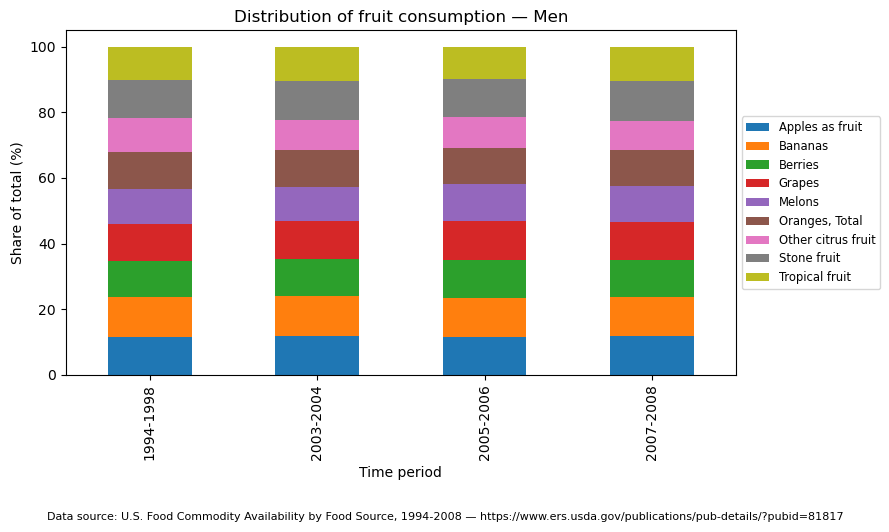

In [21]:
#print graph
plot_shares(men_fruit_share, "Distribution of fruit consumption — Men", "men_fruit_share.png")


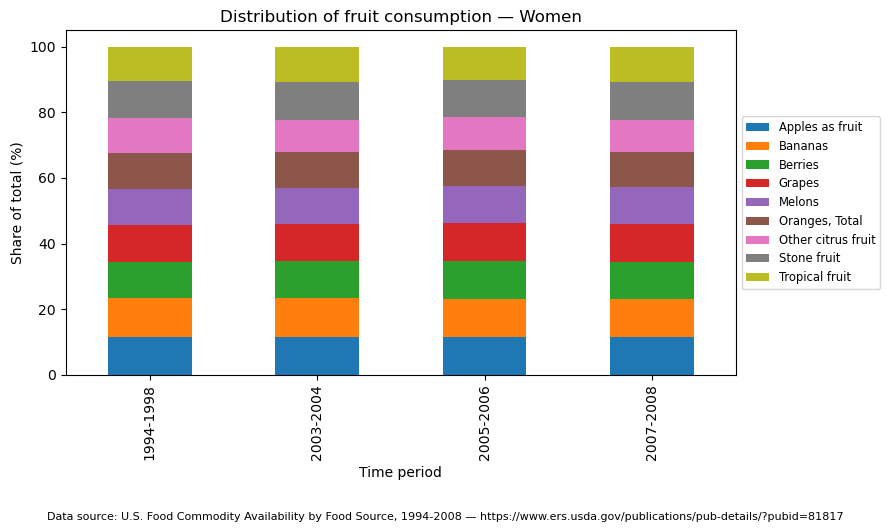

In [24]:
plot_shares(women_fruit_share, "Distribution of fruit consumption — Women", "women_fruit_share.png")